In [137]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing 
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss, accuracy_score, recall_score, precision_score, roc_curve, precision_recall_curve, auc, average_precision_score

import warnings 
warnings.filterwarnings("ignore")

In [138]:
df = pd.read_csv('./data/salary.csv', index_col=0)

print(df)
print(df.columns)

             workclass  fnlwgt    education  education-num   
age                                                          
39           State-gov   77516    Bachelors             13  \
50    Self-emp-not-inc   83311    Bachelors             13   
38             Private  215646      HS-grad              9   
53             Private  234721         11th              7   
28             Private  338409    Bachelors             13   
..                 ...     ...          ...            ...   
27             Private  257302   Assoc-acdm             12   
40             Private  154374      HS-grad              9   
58             Private  151910      HS-grad              9   
22             Private  201490      HS-grad              9   
52        Self-emp-inc  287927      HS-grad              9   

          marital-status          occupation    relationship    race      sex   
age                                                                             
39         Never-married       

<Axes: >

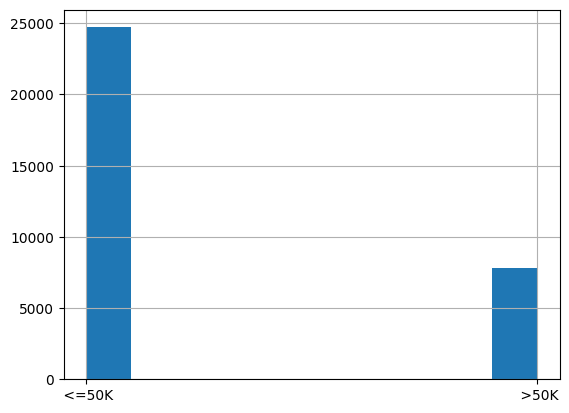

In [139]:
df['salary'].hist()

In [140]:
# Work with data
#print(columns, columns[0])
list_with_obj_name = []
binary = []
for ind, name in enumerate(df.columns):
    #if (df[columns[i]].dtype == 'object'):
    print(f'{ind + 1}. for column {name} dtype is {df[name].dtype}')
    if df[name].dtype == "object" and name != "salary":
        if len(df[name].unique()) > 2:
            list_with_obj_name.append(name)
        else:
            binary.append(name)

print(f'num for OneHotEncoder {len(list_with_obj_name)}')
print(f'num for Label( binary ) encoder {len(binary)}')
print(binary)

1. for column workclass dtype is object
2. for column fnlwgt dtype is int64
3. for column education dtype is object
4. for column education-num dtype is int64
5. for column marital-status dtype is object
6. for column occupation dtype is object
7. for column relationship dtype is object
8. for column race dtype is object
9. for column sex dtype is object
10. for column capital-gain dtype is int64
11. for column capital-loss dtype is int64
12. for column hours-per-week dtype is int64
13. for column native-country dtype is object
14. for column salary dtype is object
num for OneHotEncoder 7
num for Label( binary ) encoder 1
['sex']


<h4>Columns of our dataset are not valid for now</h4>
<h4>Let's use encoder</h4>

In [141]:
#  one_hot_encoded_data = pd.get_dummies(data, columns = ['Remarks', 'Gender']) 
#  print(one_hot_encoded_data)

# One hote encoder
df = pd.get_dummies(df, columns = list_with_obj_name)

# Label encoder
le = preprocessing.LabelEncoder()

for ind, name in enumerate(binary):
    df[name]= le.fit_transform(df[name])
df['salary'] = le.fit_transform(df['salary'])
print(df.shape)

(32561, 107)


In [142]:
df.corr()

,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
fnlwgt,1.000000,-0.043195,0.026858,0.000432,-1.025171e-02,-0.018768,-0.009463,-0.002923,-0.007525,-0.002828,...,-0.013152,0.007164,-0.003790,-0.012365,-0.001252,-0.001250,0.005273,-0.075287,-1.139827e-02,0.005501
education-num,-0.043195,1.000000,0.012280,0.122630,7.992296e-02,0.148123,0.335154,-0.077946,0.060518,0.097941,...,-0.044286,-0.041269,0.001264,0.016046,0.049472,0.007896,-0.017071,0.101207,-7.483035e-03,-0.001234
sex,0.026858,0.012280,1.000000,0.048480,4.556735e-02,0.229309,0.215980,-0.065556,0.000989,-0.037966,...,0.000464,-0.015791,-0.003504,-0.004663,0.003088,-0.014012,-0.012744,-0.006993,-1.205333e-03,0.006753
capital-gain,0.000432,0.122630,0.048480,1.000000,-3.161506e-02,0.078409,0.223329,-0.015585,-0.005768,-0.007007,...,-0.003879,-0.006103,-0.001680,0.005323,0.005735,-0.003432,-0.003526,0.004599,-2.564276e-03,-0.002193
capital-loss,-0.010252,0.079923,0.045567,-0.031615,1.000000e+00,0.054256,0.150526,-0.016102,0.010798,0.014668,...,-0.007308,-0.004718,-0.004160,0.010114,0.006637,-0.005095,0.008102,0.008784,-5.997599e-07,-0.004804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_ Thailand,-0.001250,0.007896,-0.014012,-0.003432,-5.095482e-03,0.009537,-0.004078,-0.000085,-0.004099,-0.006164,...,-0.000793,-0.001394,-0.000452,-0.001167,-0.000932,1.000000,-0.000568,-0.068978,-1.067931e-03,-0.000521
native-country_ Trinadad&Tobago,0.005273,-0.017071,-0.012744,-0.003526,8.102329e-03,-0.006006,-0.007660,-0.000393,-0.004212,-0.001148,...,-0.000815,-0.001432,-0.000464,-0.001199,-0.000957,-0.000568,1.000000,-0.070869,-1.097212e-03,-0.000536
native-country_ United-States,-0.075287,0.101207,-0.006993,0.004599,8.783567e-03,0.002446,0.034470,0.006193,0.015441,0.033196,...,-0.098924,-0.173848,-0.056315,-0.145558,-0.116167,-0.068978,-0.070869,1.000000,-1.331803e-01,-0.065031
native-country_ Vietnam,-0.011398,-0.007483,-0.001205,-0.002564,-5.997599e-07,-0.011379,-0.017649,-0.002286,0.000099,-0.003611,...,-0.001532,-0.002692,-0.000872,-0.002254,-0.001799,-0.001068,-0.001097,-0.133180,1.000000e+00,-0.001007


In [143]:
df.groupby(by=['salary']).corr()

fnlwgt  education-num       sex   
salary                                                                      
0      fnlwgt                           1.000000      -0.054418  0.032466  \
       education-num                   -0.054418       1.000000 -0.073679   
       sex                              0.032466      -0.073679  1.000000   
       capital-gain                    -0.000130       0.011695  0.022130   
       capital-loss                    -0.012997       0.016375  0.014807   
...                                          ...            ...       ...   
1      native-country_ Thailand         0.002247       0.008654 -0.010015   
       native-country_ Trinadad&Tobago -0.004036      -0.030886  0.006720   
       native-country_ United-States   -0.018219      -0.044989  0.007986   
       native-country_ Vietnam         -0.011420      -0.021306 -0.003508   
       native-country_ Yugoslavia       0.002444      -0.014832 -0.001262   

                                        capital-gain  capital-loss   
salary                                                               
0      fnlwgt                              -0.000130     -0.012997  \
       education-num                        0.011695      0.016375   
       sex                                  0.022130      0.014807   
       capital-gain                         1.000000     -0.026413   
       capital-loss                        -0.026413      1.000000   
...                                              ...           ...   
1      native-country_ Thailand            -0.005379     -0.006407   
       native-country_ Trinadad&Tobago     -0.004392      0.020078   
       native-country_ United-States       -0.008725     -0.002947   
       native-country_ Vietnam              0.003238     -0.008272   
       native-country_ Yugoslavia          -0.005850     -0.009063   

                                        hours-per-week  workclass_ ?   
salary                                                                 
0      fnlwgt                                -0.021430     -0.003134  \
       education-num                          0.082319     -0.062688   
       sex                                    0.188974     -0.049528   
       capital-gain                           0.017938      0.002885   
       capital-loss                           0.018695     -0.004452   
...                                                ...           ...   
1      native-country_ Thailand               0.022847     -0.003091   
       native-country_ Trinadad&Tobago       -0.007938     -0.002524   
       native-country_ United-States          0.009608      0.003908   
       native-country_ Vietnam               -0.014389     -0.003991   
       native-country_ Yugoslavia             0.010119     -0.004373   

                                        workclass_ Federal-gov   
salary                                                           
0      fnlwgt                                        -0.009517  \
       education-num                                  0.057001   
       sex                                           -0.016576   
       capital-gain                                   0.003967   
       capital-loss                                   0.019173   
...                                                        ...   
1      native-country_ Thailand                      -0.004360   
       native-country_ Trinadad&Tobago               -0.003560   
       native-country_ United-States                 -0.007088   
       native-country_ Vietnam                        0.018166   
       native-country_ Yugoslavia                    -0.006167   

                                        workclass_ Local-gov   
salary                                                         
0      fnlwgt                                      -0.008513  \
       education-num                                0.101947   
       sex                                         -0.037934   
       capita

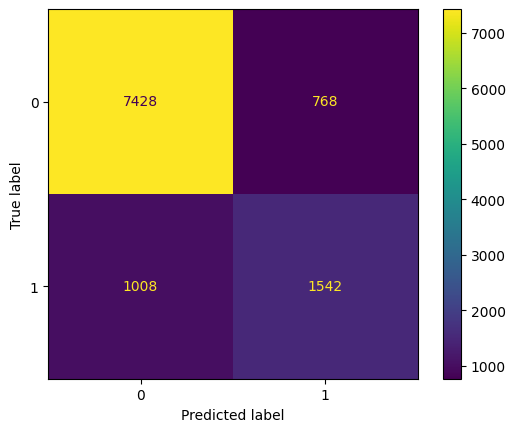

In [144]:
X = df.drop(columns='salary')
y = df['salary']

#print(X)
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.67, 
                                                    random_state=42)


# Models fiting and imagineshion
#X_train, X_test, y_train, y_test
model = RandomForestClassifier(
    n_estimators = 100
)

# Обучаем на тренировочных данных
model.fit(X_train, y_train)

# Действующая классификация
rf_predictions = model.predict(X_test)
# Вероятности для каждого класса
rf_probs = model.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_true=y_test, y_pred = rf_predictions)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)

vis.plot()
plt.show()

In [145]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, rf_predictions)
# Calculate the precision
precision = precision_score(y_test, rf_predictions)
# Calculate the recall
recall = recall_score(y_test, rf_predictions)
# Calculate the f1 score
f1 = f1_score(y_test, rf_predictions)

print(f'metrics here is \n1. acc = {accuracy}\n2. pre = {precision}\n3. rec = {recall}\n4. acc = {accuracy}\n')

metrics here is 
1. acc = 0.8347292015633724
2. pre = 0.6675324675324675
3. rec = 0.6047058823529412
4. acc = 0.8347292015633724



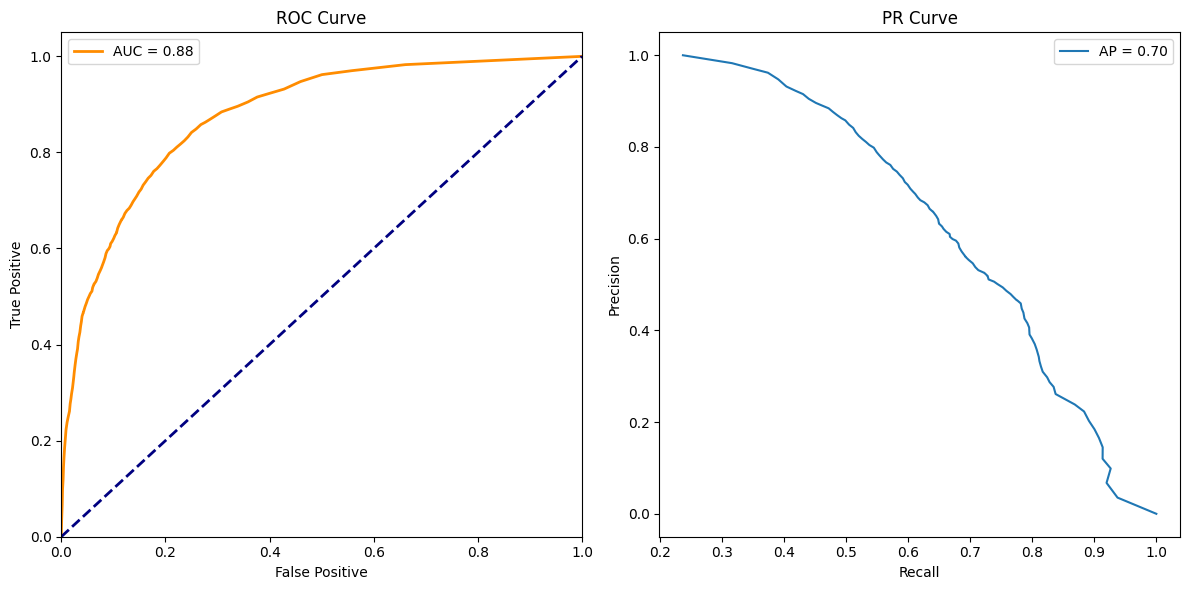

In [146]:
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, rf_probs)
average_precision = average_precision_score(y_test, rf_probs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(precision, recall, label=f"AP = {average_precision:.2f}")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'PR Curve')
plt.legend()

plt.tight_layout()
plt.show()

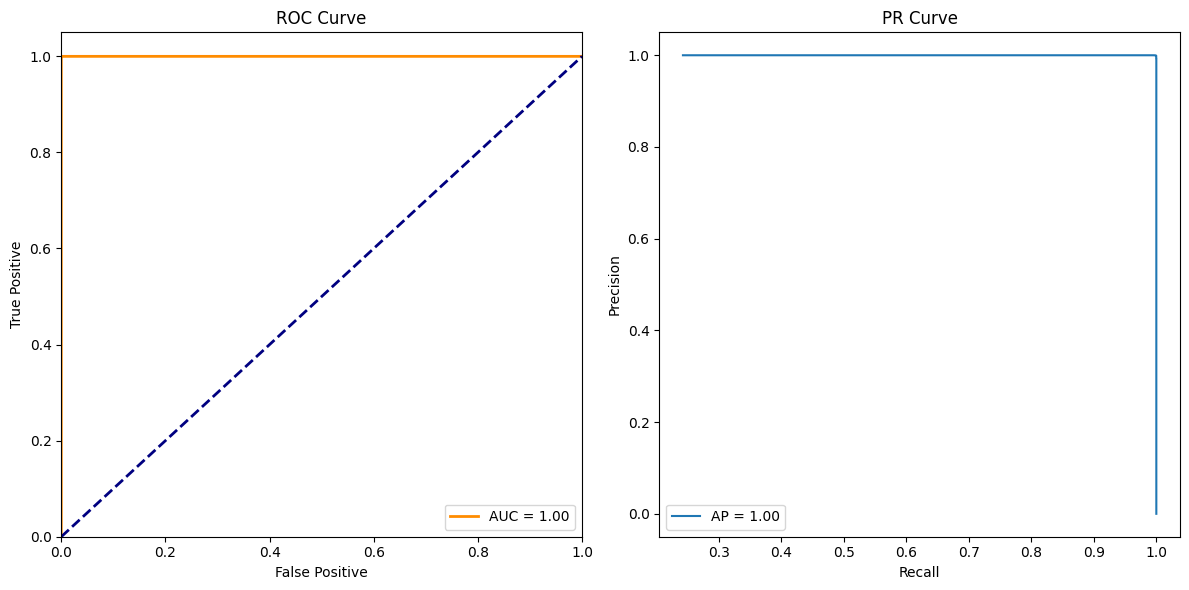

In [147]:
pred_for_tr = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, pred_for_tr)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_train, pred_for_tr)
average_precision = average_precision_score(y_train, pred_for_tr)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(precision, recall, label=f"AP = {average_precision:.2f}")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'PR Curve')
plt.legend()

plt.tight_layout()
plt.show()

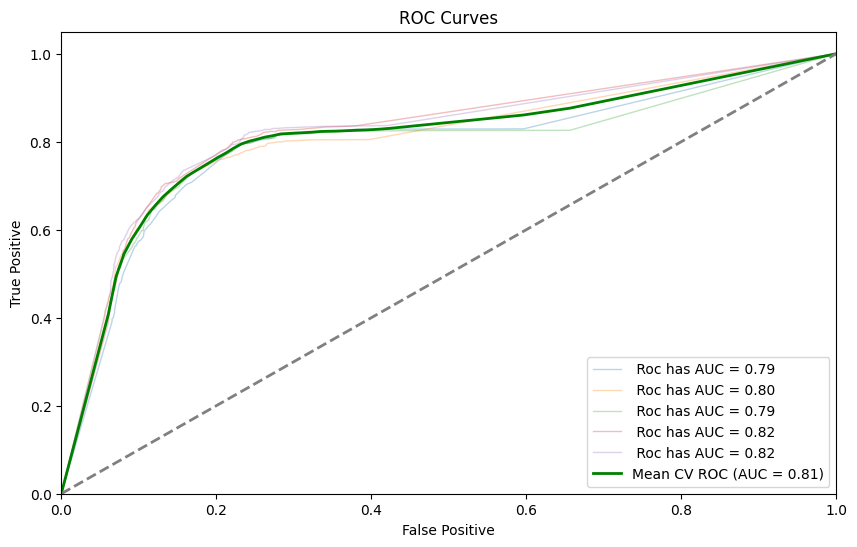

In [150]:
xs = df.drop("salary", axis=1)
ys = df["salary"]

cv = StratifiedKFold(n_splits=5)
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = 0

plt.figure(figsize=(10, 6))



for train, test in cv.split(xs, ys):
    model = DecisionTreeClassifier(
        max_depth=20
    )
    model.fit(xs.iloc[train], ys.iloc[train])
    y_scores_cv = model.predict_proba(xs.iloc[test])[:, 1]
    fpr, tpr, _ = roc_curve(ys.iloc[test], y_scores_cv)
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f' Roc has AUC = {roc_auc:.2f}')

mean_tpr /= cv.get_n_splits()
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, color='green', lw=2, label=f'Mean CV ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()
plt.title('ROC Curves')

plt.show()

Gradient Boosting (Log loss) AUC: 0.8866313797802989
Gradient Boosting (Exponential) AUC: 0.910162565208988
Gradient Boosting (deviance) AUC: 0.910162565208988


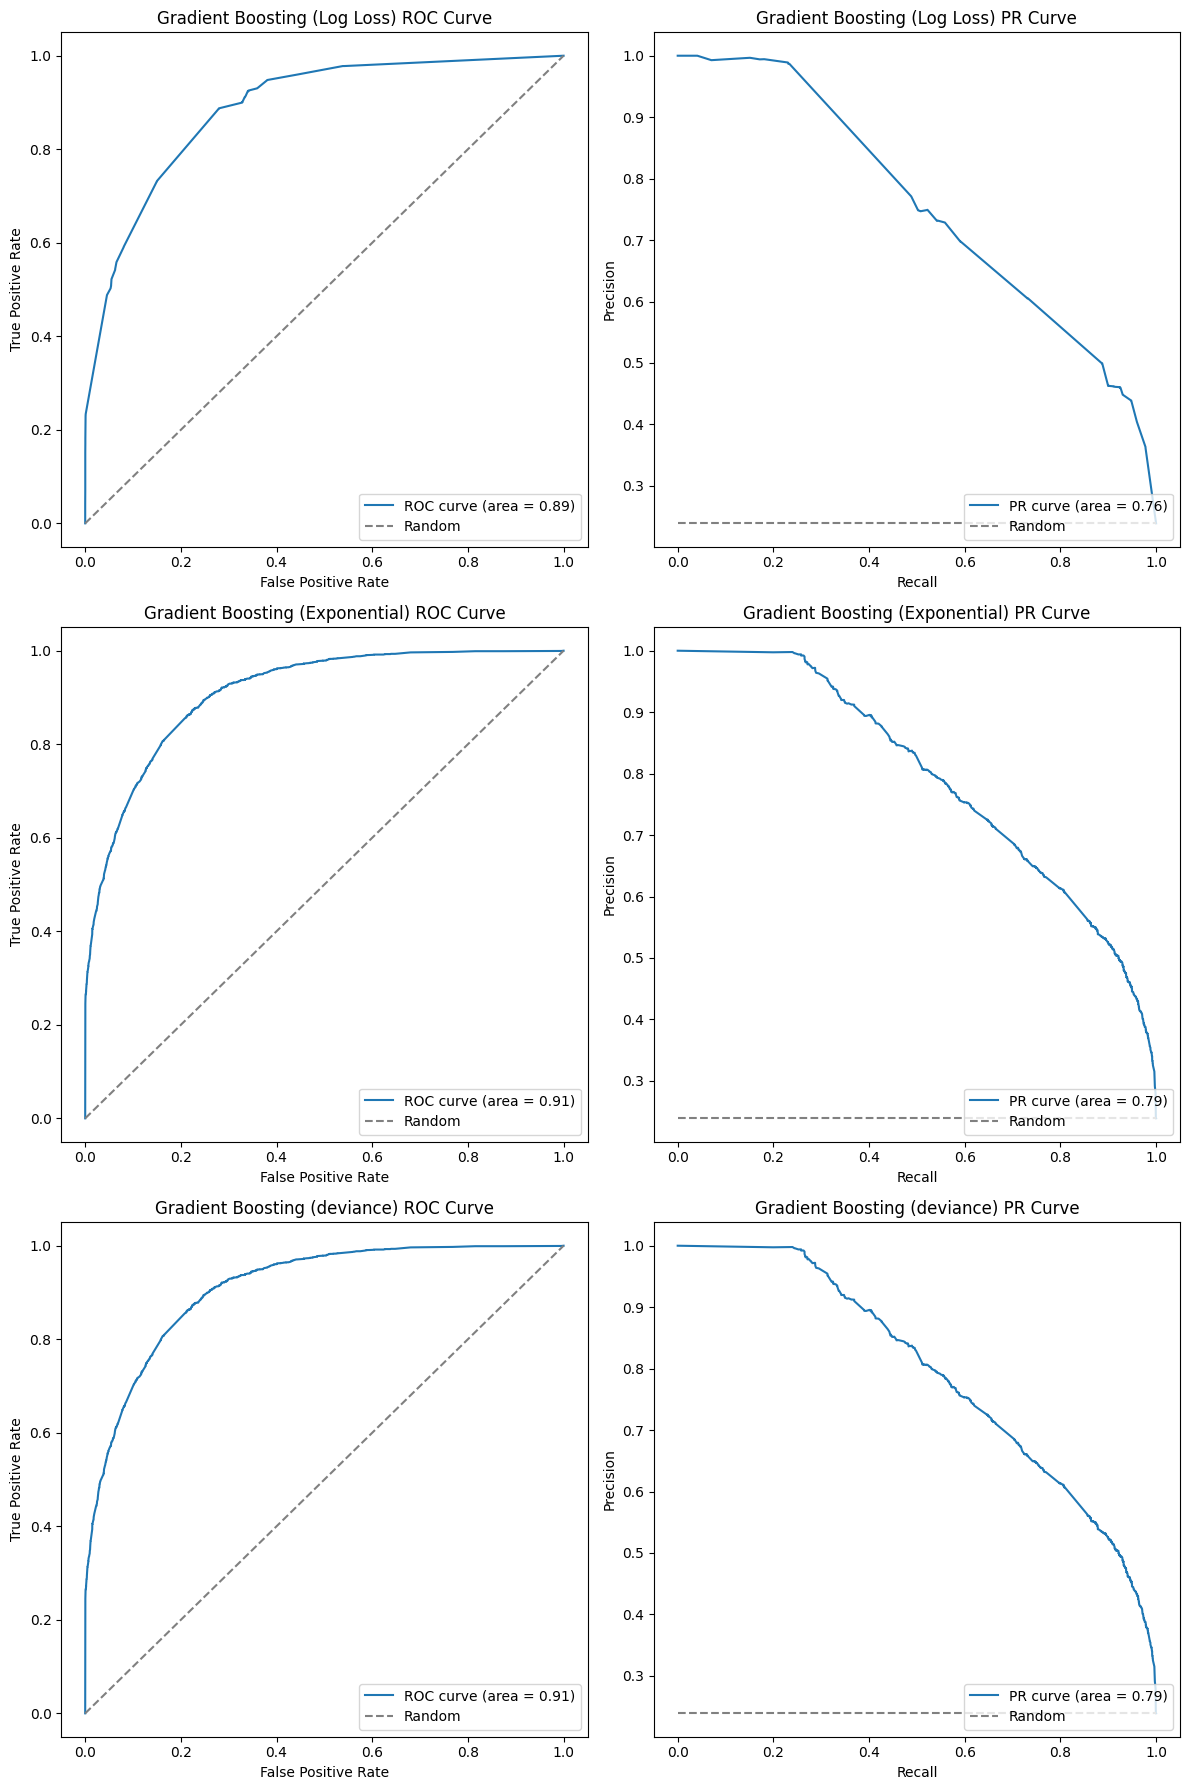

In [165]:
# Calculate difference between Gradiaent with log_loss and Exponential

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score


X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.25)

# Обучение Gradient Boosting с deviance (log loss)
gb_deviance_model = GradientBoostingClassifier(loss='log_loss',
                                          n_estimators=10,
                                          max_depth=3)
gb_deviance_model.fit(X_train, y_train)
y_pred_gb_deviance = gb_deviance_model.predict_proba(X_test)[:, 1]
gb_deviance_auc = roc_auc_score(y_test, y_pred_gb_deviance)

# Обучение Gradient Boosting с exponential
gb_exponential_model = GradientBoostingClassifier(loss='exponential',
                                          n_estimators=10,
                                          max_depth=10)
gb_exponential_model.fit(X_train, y_train)
y_pred_gb_exponential = gb_exponential_model.predict_proba(X_test)[:, 1]
gb_exponential_auc = roc_auc_score(y_test, y_pred_gb_exponential)

# Обучение Gradient Boosting с exponential
gb_dev_model = GradientBoostingClassifier(loss ='deviance',
                                          n_estimators=10,
                                          max_depth=8)
gb_dev_model.fit(X_train, y_train)
y_pred_gb_dev = gb_exponential_model.predict_proba(X_test)[:, 1]
gb_dev_auc = roc_auc_score(y_test, y_pred_gb_exponential)

print(f"Gradient Boosting (Log loss) AUC: {gb_deviance_auc}")
print(f"Gradient Boosting (Exponential) AUC: {gb_exponential_auc}")
print(f"Gradient Boosting (deviance) AUC: {gb_dev_auc}")


# Функция для построения ROC и PR кривых с линиями baseline
def plot_curve_with_baseline(subplot, x, y, auc, title, xlabel, ylabel, baseline, curve_type='ROC'):
    subplot.plot(x, y, label=f'{curve_type} curve (area = {auc:.2f})')
    subplot.plot(baseline[0], baseline[1], linestyle='--', color='gray', label='Random')
    subplot.set_xlabel(xlabel)
    subplot.set_ylabel(ylabel)
    subplot.set_title(title)
    subplot.legend(loc='lower right')

# Создание фигуры с несколькими подграфиками
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

# ROC и PR кривые для Gradient Boosting Deviance
fpr, tpr, _ = roc_curve(y_test, y_pred_gb_deviance)
precision, recall, _ = precision_recall_curve(y_test, y_pred_gb_deviance)
plot_curve_with_baseline(axs[0, 0], fpr, tpr, gb_deviance_auc, 'Gradient Boosting (Log Loss) ROC Curve', 'False Positive Rate', 'True Positive Rate', [[0, 1], [0, 1]])
plot_curve_with_baseline(axs[0, 1], recall, precision, auc(recall, precision), 'Gradient Boosting (Log Loss) PR Curve', 'Recall', 'Precision', [[0, 1], [len(y_test[y_test==1]) / len(y_test)]*2], curve_type='PR')

# ROC и PR кривые для Gradient Boosting Exponential
fpr, tpr, _ = roc_curve(y_test, y_pred_gb_exponential)
precision, recall, _ = precision_recall_curve(y_test, y_pred_gb_exponential)
plot_curve_with_baseline(axs[1, 0], fpr, tpr, gb_exponential_auc, 'Gradient Boosting (Exponential) ROC Curve', 'False Positive Rate', 'True Positive Rate', [[0, 1], [0, 1]])
plot_curve_with_baseline(axs[1, 1], recall, precision, auc(recall, precision), 'Gradient Boosting (Exponential) PR Curve', 'Recall', 'Precision', [[0, 1], [len(y_test[y_test==1]) / len(y_test)]*2], curve_type='PR')

# ROC и PR кривые для Gradient Boosting Deviance
fpr, tpr, _ = roc_curve(y_test, y_pred_gb_dev)
precision, recall, _ = precision_recall_curve(y_test, y_pred_gb_dev)
plot_curve_with_baseline(axs[2, 0], fpr, tpr, gb_dev_auc, 'Gradient Boosting (deviance) ROC Curve', 'False Positive Rate', 'True Positive Rate', [[0, 1], [0, 1]])
plot_curve_with_baseline(axs[2, 1], recall, precision, auc(recall, precision), 'Gradient Boosting (deviance) PR Curve', 'Recall', 'Precision', [[0, 1], [len(y_test[y_test==1]) / len(y_test)]*2], curve_type='PR')



plt.tight_layout()
plt.show()